In [1]:
import unittest

from numpy import linspace, ndarray, array
import numpy as np
from numpy.testing import assert_allclose
from numpy.random import uniform, randint
from scipy.optimize import check_grad
import pennylane as qml

from cost import Cost

model = Cost(x=uniform(-20, 20, 10), fn=0, encoding="amp")
φ = np.random.randn(4 * 6)

def split(φ):
    layers = φ.size // 4
    return φ[0:layers], φ[layers:].reshape(3, layers)

def fun(φ):
    w, θ = split(φ)
    return np.sum(model._encoding(θ, w))

def grad(φ):
    w, θ = split(φ)
    return np.sum(model._der_amp_encoding(θ, w), axis=0)

print("check grad ", check_grad(fun, grad, φ))
assert check_grad(fun, grad, φ) < 1e-4

(6, 4, 10, 2, 2)
(10, 4, 6)
(10, 24)
check grad  20.97278477165759
(6, 4, 10, 2, 2)
(10, 4, 6)
(10, 24)


c:\Users\pablovegan98\miniconda3\envs\qml\lib\site-packages\scipy\optimize\_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx


AssertionError: 

In [2]:
model = Cost(x=uniform(-20, 20, 10), fn=0, encoding="amp")
φ = np.random.randn(4 * 6)
w, θ = split(φ)
a = model._der_amp_encoding(θ, w)

(6, 4, 10, 2, 2)
(10, 4, 6)
(10, 24)


## Vector de shakespeare

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [14]:
df = pd.read_csv('OneHot_Encoding.csv')
onehot_vector = df['Word_Count'].to_numpy(dtype=np.float)[:2**11]  # usaremos 11 qubits i.e 2048 palabras
# onehot_vector = onehot_vector / np.sqrt(np.sum(onehot_vector**2))
onehot_vector = onehot_vector / onehot_vector[0]

C:\Users\pablovegan98\AppData\Local\Temp\ipykernel_13064\597400877.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onehot_vector = df['Word_Count'].to_numpy(dtype=np.float)[:2**11]  # usaremos 11 qubits i.e 2048 palabras


Parámetros iniciales:  [-0.12502735 -0.01688005 -0.64085883  0.49208124 -0.53803068 -0.25252421
  0.15086443 -0.37358643]


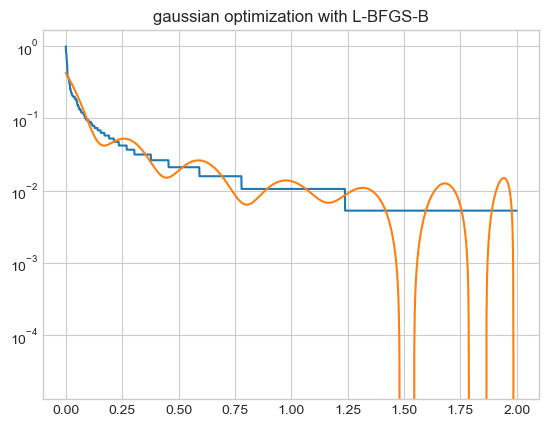

Parámetros finales:  [-3.31813329e-01 -1.33895106e+00 -5.15647841e+00 -9.74019324e+00
 -6.10500357e+00 -5.60225711e-01  9.21658439e+00 -7.35763722e+00
 -8.60503665e-01  3.67098706e+00  2.28525104e-01 -1.33309755e+00
  5.44568399e-03  1.31227228e+00 -2.57254275e+00 -1.97546718e-01
 -7.57873633e-01 -1.37073264e+00 -9.53994612e-01  4.95348270e+00
  4.51879093e-03 -2.20454360e-01  1.80882419e-01 -6.55464044e-02
 -9.40797292e-01  4.57643920e-01  3.27785692e+00 -2.39215653e+00
  3.99179238e-01 -1.25712089e-02  6.98167502e-02 -2.40368119e+00
  2.81597216e+00 -4.95394756e-01  1.17649827e+00 -1.19183700e+00
  4.40438353e+00  1.06672798e+00 -6.97143556e-01 -1.87003945e+00]


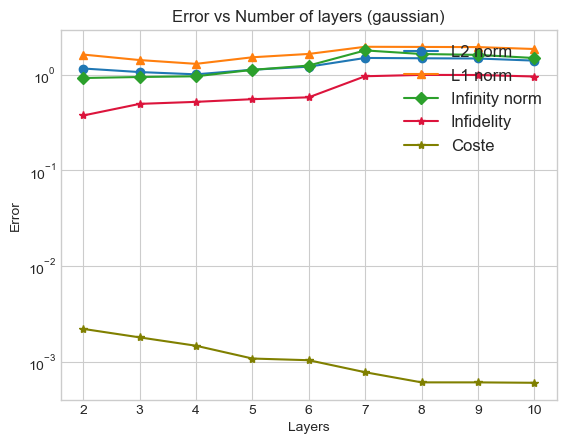

([1.1626523423868866,
  1.0672370599205756,
  1.0106977575404077,
  1.1286368665066828,
  1.2149834522069125,
  1.4992077099777454,
  1.4875110489714287,
  1.4794186770273057,
  1.4057161772377313],
 [1.6261400006132938,
  1.4242879615154953,
  1.300920884409805,
  1.5237164723294503,
  1.6512647888578507,
  1.96129384567435,
  1.954277500752074,
  1.9466626459419945,
  1.859401498148892],
 [0.9250161318589153,
  0.9478284825415934,
  0.9644123831171911,
  1.125744300460788,
  1.2484809993349166,
  1.797119885119169,
  1.6482362622708562,
  1.6144171801251206,
  1.496200810905156],
 [0.3754337048239118,
  0.4964165998428035,
  0.5211403374240543,
  0.5557440579428812,
  0.5812829640575299,
  0.965238040697331,
  0.9967964527334627,
  0.994692651525514,
  0.9591920971808071],
 array([0.00220695, 0.00179945, 0.00147126, 0.00108164, 0.00103866,
        0.0007779 , 0.00060949, 0.00060936, 0.00060348]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 2)

In [24]:
from main_1D import *

x = np.linspace(0, 2, 2048)

graficas_errores(seed = 2,
                min_layers = 2,
                max_layers = 7,
                x = x,
                f = onehot_vector,
                incremental_opt = True,
                opt_method='L-BFGS-B',
                cost_fun='normal',
                print_params=True,
                probability=False)

In [32]:
def split(φ):
    layers = φ.size // 4
    return φ[0:layers], φ[layers:].reshape(3, layers)

φ = np.array([-3.31813329e-01, -1.33895106e+00, -5.15647841e+00, -9.74019324e+00,
 -6.10500357e+00, -5.60225711e-01 , 9.21658439e+00 ,-7.35763722e+00,
 -8.60503665e-01,  3.67098706e+00 , 2.28525104e-01 ,-1.33309755e+00,
  5.44568399e-03,  1.31227228e+00, -2.57254275e+00, -1.97546718e-01,
 -7.57873633e-01, -1.37073264e+00 ,-9.53994612e-01,  4.95348270e+00,
  4.51879093e-03, -2.20454360e-01,  1.80882419e-01, -6.55464044e-02,
 -9.40797292e-01,  4.57643920e-01,  3.27785692e+00, -2.39215653e+00,
  3.99179238e-01, -1.25712089e-02,  6.98167502e-02, -2.40368119e+00,
  2.81597216e+00, -4.95394756e-01 , 1.17649827e+00, -1.19183700e+00,
  4.40438353e+00 , 1.06672798e+00, -6.97143556e-01, -1.87003945e+00])

w, θ = split(φ)

approx_vector = evalua_modelo(x, θ, w, probability=False)
np.sum((approx_vector - onehot_vector)**2)

(1.2100028755959527+0.01957655940350449j)

## Distribución de zipf

In [5]:
from main_1D import *
from scipy.special import zeta  


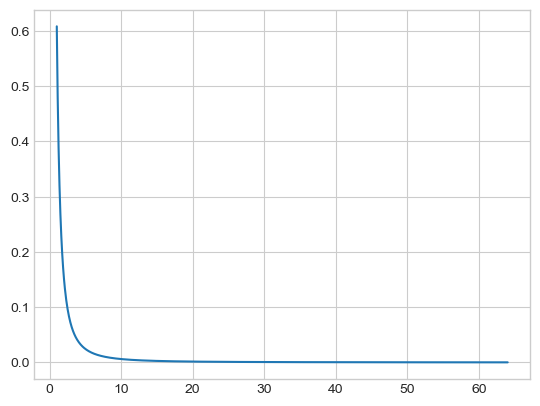

In [6]:
a = np.linspace(1,64,1000)
z = (a**-2)/zeta(2)
plt.plot(a, z)

In [7]:
k = np.linspace(1,5,1000)
zipf = (k**-4)/zeta(4)

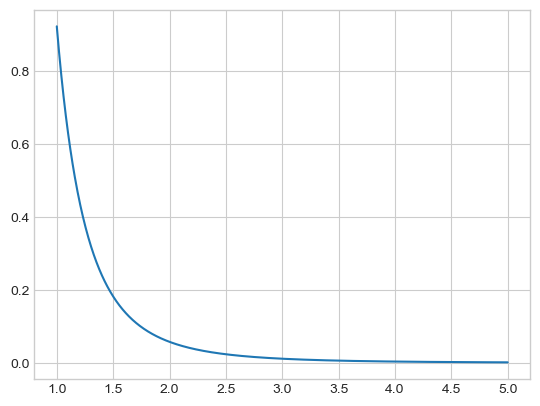

In [8]:
plt.plot(k, zipf)

In [9]:
graficas_errores(seed = 2,
                min_layers = 2,
                max_layers = 10,
                x = k,
                f = zipf,
                incremental_opt = True)

KeyboardInterrupt: 